# Business Understanding

Het jaarlijkse energieverbruik door Nederlanders blijft maar toenemen, ondanks alle bezuinigende maatregelen die we treffen als volk. Het toenemende energiegebruik is mede verantwoordelijk voor de wereldwijde klimaatveranderingen. De gemiddelde temperatuur over de afgelopen eeuw is gestegen, de hoeveelheid en intensiteit van neerslag zijn toegenomen en zeer warme dagen komen steeds vaker voor. Het realiseren van de klimaatdoelen van Parijs is nodig om verdere opwarming van de aarde en de gevolgen daarvan zo veel mogelijk te voorkomen. Om aan de afspraken van Parijs te voldoen moet Nederland overstappen van fossiele brandstoffen op duurzame energiebronnen zoals zon en wind. Het is daarom belangrijker dan ooit om na te denken over nieuwe manieren van energie opwekken en het indammen van energieverspilling. 

Enexis, Liander en Stedin zijn de drie grote netwerkbeheerders van Nederland en leveren samen energie aan bijna het hele land. Elk jaar publiceren deze bedrijven een tabel met het energieverbruik van de gebieden die onder hun beheer vallen, op hun websites. 
Welke inzichten kunnen uit deze Nederlandse verbruiksdata gegenereerd worden? En hoe kunnen we deze inzichten toepassen om een bijdrage te kunnen leveren aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling? 

Het doel van deze challenge is om inzichten te creëren die wellicht kunnen bijdragen aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling. Om niet verdwaald te raken in alle mogelijkheden die deze datasets bieden, zijn er van te voren een aantal hoofdvragen opgesteld. Deze hoofdvragen kunnen later nog worden opgesplitst in deelvragen.
Als we kijken naar de data die beschikbaar is, kunnen we een aantal vragen bedenken die wellicht met behulp van data science kunnen worden opgelost. Deze vragen zijn als volgt:
- Welke regio’s zijn de grootgebruikers van het land en waar ligt dit aan?
- Kunnen we het gas- en/of energieverbruik van het/de aankomende jaar/jaren voorspellen en zo ja, wat vertelt deze voorspelling ons?
- Kunnen we achterhalen wat voor type gebruiker (bijv. een winkel of huis) de meeste energie verspilt en zo ja, hier een oplossing voor bedenken?


# Data Understanding

De data bestaat zowel uit gasverbruik als energieverbruik. In de data worden een aantal kolommen gebruikt die hieronder toegelicht worden:

| **Kolomnaam** | **Toelichting** | **Voorbeeld** |
| --- | --- | --- |
| net\_manager | Welk bedrijf het netwerk onderhoud. | Enexis B.V. |
| purchase\_area | Bij welk bedrijf de elektriciteit en gas gekocht wordt. | ENEXIS |
| street | Over welke straat de data gaat. | Sasdijk |
| zipcode\_from | Deze vormt samen met zipcode\_to een range over welke postcodes de data gaat. | 4251AB |
| zipcode\_to | Deze vormt samen met zipcode\_from een range over welke postcodes de data gaat. Deze is gelijk aan zipcode\_from als het postcodegebied meer dan 9 aansluitingen heeft. | 4251AB |
| city | Uit welke stad de data komt. | WERKENDAM |
| num\_connections | De hoeveelheid aansluitingen die binnen de range zijn van de postcodes. | 16 |
| delivery\_perc | Welk percentage van het stroomverbruik geleverd is door de energieleverancier. Wanneer een locatie bijvoorbeeld zonnepanelen heeft is dit percentage lager. | 100 |
| perc\_of\_active\_connections | Welk percentage van de aansluitingen actief zijn. | 100 |
| type\_conn\_perc | Welk percentage van de aansluitingen bestaat uit het type van type\_if\_connection. | 50 |
| type\_of\_connection | Welk soort aansluiting er aanwezig is. Voor elektriciteit is dit #zekeringen X #ampère. Voor gas is G4, G6, G10, G16 en G25. Deze aansluitingen hebben verschillende doorlaat waardes, G6 10m3 per uur door. | Gas: G6Elektriciteit: 1X25 |
| annual\_consume | Jaarlijks gebruik in kWh voor elektriciteit of voor gas in m3 | elektriciteit:4961gas:3215 |
| annual\_consume\_lowtarif\_perc | Welk percentage van het verbruikt tijdens laag tarief is(tussen 22:00 en 07:00 en in het weekend) | 25 |
| smartmeter\_perc | percentage gebruik smartmeter (alle generaties) | 0 |

In [1]:
import pandas as pd
import glob
gasPath = 'datasets\Gas'
elecPath = 'datasets\Electricity'

## Stedin Gas

In [2]:
stedin_gas = glob.glob(gasPath + "/stedin_*.csv")
li = []  #waarom variabele li? (naarmate ik hier langer mee bezig was bedacht ik me dat het mogelijk voor list staat?)

for filename in stedin_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedinFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedinFrame.info())
print(stedinFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850470 entries, 0 to 850469
Data columns (total 15 columns):
net_manager                     850470 non-null int64
purchase_area                   850468 non-null object
street                          850469 non-null object
zipcode_from                    850468 non-null object
zipcode_to                      850468 non-null object
city                            850467 non-null object
num_connections                 850466 non-null float64
delivery_perc                   850466 non-null float64
perc_of_active_connections      850466 non-null float64
type_conn_perc                  850466 non-null float64
type_of_connection              850466 non-null object
annual_consume                  850466 non-null float64
annual_consume_lowtarif_perc    850464 non-null float64
smartmeter_perc                 850464 non-null float64
year                            850470 non-null object
dtypes: float64(7), int64(1), object(7)
memory usage: 97.3

## Stedin Elektriciteit

In [3]:
stedin_elec = glob.glob(elecPath + "/stedin_*.csv")
li = []

for filename in stedin_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedin_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedin_Elec_Frame.info())
print(stedin_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913096 entries, 0 to 913095
Data columns (total 15 columns):
net_manager                     913096 non-null int64
purchase_area                   913096 non-null object
street                          913096 non-null object
zipcode_from                    913096 non-null object
zipcode_to                      913096 non-null object
city                            913096 non-null object
num_connections                 913096 non-null int64
delivery_perc                   913096 non-null float64
perc_of_active_connections      913096 non-null float64
type_conn_perc                  913096 non-null float64
type_of_connection              913096 non-null object
annual_consume                  913096 non-null int64
annual_consume_lowtarif_perc    913096 non-null float64
smartmeter_perc                 913096 non-null float64
year                            913096 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 104.5+ M

## Liander Gas

In [4]:
liander_gas = glob.glob(gasPath + "/liander_*.csv") 

li = []

for filename in liander_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

lianderFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(lianderFrame.info())
print(lianderFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825457 entries, 0 to 825456
Data columns (total 15 columns):
net_manager                     825457 non-null object
purchase_area                   631216 non-null object
street                          825453 non-null object
zipcode_from                    825452 non-null object
zipcode_to                      825451 non-null object
city                            825450 non-null object
num_connections                 825447 non-null float64
delivery_perc                   825447 non-null float64
perc_of_active_connections      825446 non-null float64
type_conn_perc                  825446 non-null float64
type_of_connection              825446 non-null object
annual_consume                  825446 non-null float64
annual_consume_lowtarif_perc    825446 non-null float64
smartmeter_perc                 825446 non-null float64
year                            825457 non-null object
dtypes: float64(7), object(8)
memory usage: 94.5+ MB
None

## Liander Elektriciteit

In [5]:
liander_elec = glob.glob(elecPath + "/liander_*.csv")
li = []

for filename in liander_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

liander_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(liander_Elec_Frame.info())
print(liander_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511295 entries, 0 to 1511294
Data columns (total 15 columns):
net_manager                     1511295 non-null object
purchase_area                   624638 non-null object
street                          1511295 non-null object
zipcode_from                    1511295 non-null object
zipcode_to                      1511295 non-null object
city                            1511295 non-null object
num_connections                 1511295 non-null float64
delivery_perc                   1511295 non-null float64
perc_of_active_connections      1511295 non-null float64
type_conn_perc                  1511295 non-null float64
type_of_connection              1511295 non-null object
annual_consume                  1511295 non-null float64
annual_consume_lowtarif_perc    1511295 non-null float64
smartmeter_perc                 1511295 non-null float64
year                            1511295 non-null object
dtypes: float64(7), object(8)
memory usag

## Enexis Gas

In [6]:
enexis_gas = glob.glob(gasPath + "/enexis_*.csv")
li = []

for filename in enexis_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexisFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexisFrame.info())
print(enexisFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925838 entries, 0 to 925837
Data columns (total 15 columns):
net_manager                     925838 non-null object
purchase_area                   925838 non-null object
street                          925838 non-null object
zipcode_from                    925838 non-null object
zipcode_to                      925838 non-null object
city                            925838 non-null object
delivery_perc                   925837 non-null float64
num_connections                 925838 non-null int64
perc_of_active_connections      925837 non-null float64
type_conn_perc                  842871 non-null float64
type_of_connection              842871 non-null object
annual_consume                  925837 non-null float64
annual_consume_lowtarif_perc    925836 non-null float64
smartmeter_perc                 0 non-null float64
year                            925838 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 106.0+ MB


## Enexis Elektriciteit

In [7]:
enexis_elec = glob.glob(elecPath + "/enexis_*.csv")
li = []

for filename in enexis_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexis_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexis_Elec_Frame.info())
print(enexis_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141402 entries, 0 to 1141401
Data columns (total 15 columns):
net_manager                     1141402 non-null object
purchase_area                   1141402 non-null object
street                          1141402 non-null object
zipcode_from                    1141402 non-null object
zipcode_to                      1141402 non-null object
city                            1141402 non-null object
delivery_perc                   1140820 non-null float64
num_connections                 1141402 non-null int64
perc_of_active_connections      1141402 non-null int64
type_conn_perc                  1033890 non-null float64
type_of_connection              1033821 non-null object
annual_consume                  1141402 non-null float64
annual_consume_lowtarif_perc    1141402 non-null float64
smartmeter_perc                 1141402 non-null float64
year                            1141402 non-null object
dtypes: float64(5), int64(2), object(8)
memo

In [8]:
gasFrame = pd.concat([stedinFrame, lianderFrame, enexisFrame], sort=True)
print(gasFrame.info())
print(gasFrame.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601765 entries, 0 to 925837
Data columns (total 15 columns):
annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                            object
delivery_perc                   float64
net_manager                     object
num_connections                 float64
perc_of_active_connections      float64
purchase_area                   object
smartmeter_perc                 float64
street                          object
type_conn_perc                  float64
type_of_connection              object
year                            object
zipcode_from                    object
zipcode_to                      object
dtypes: float64(7), object(8)
memory usage: 317.6+ MB
None
   annual_consume  annual_consume_lowtarif_perc          city  delivery_perc  \
0          2611.0                           0.0     AMSTERDAM          100.0   
1          2993.0                           0.0     AMSTERDAM          100.0 

In [9]:
uniqueCities = gasFrame.set_index('city').index.unique().sort_values()
print(len(uniqueCities))
print(uniqueCities)

# We see that not all cities are written the same way. i.e. 'S-GRAVENHAGE, 'S GRAVENHAGE, S- GRAVENHAGE, S-GRAVENHAGE etc.

TypeError: '<' not supported between instances of 'float' and 'str'

# Data Preparation

### Gas

In [ ]:
# df.loc[~df['city'].str.contains('S-', na=False), 'city'] = df.loc[~df['city'].str.contains('S-', na=False), 'city'].str.replace('S-', 'bla')

gasFrame.loc[gasFrame['city'].str.startswith('\'S-'), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S-'), 'city'].str.replace('\'S-', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('S-'), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('S-'), 'city'].str.replace('S-', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('\'S- '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S- '), 'city'].str.replace('\'S- ', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('S '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('S '), 'city'].str.replace('S ', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('\'S '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S '), 'city'].str.replace('\'S ', 'S-')

print(gasFrame.loc[gasFrame['city'].str.contains('\'S GRAVENHAGE')])

In [ ]:
cleanedUniqueCities = gasFrame.set_index('city').index.unique().sort_values()
print(len(cleanedUniqueCities))
print(cleanedUniqueCities)

### Elektriciteit

In [ ]:
elecFrame = pd.concat([stedin_Elec_Frame.drop(0), liander_Elec_Frame.drop(0), enexis_Elec_Frame.drop(0)], sort=False) 
# zonder drop blijven de indexes van de originele dataframes er in staan, dit resulteert er in dat er 3 dataframes met index 0 voorkomen

print(elecFrame.info())
elecFrame.head()

# Modeling

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

2129


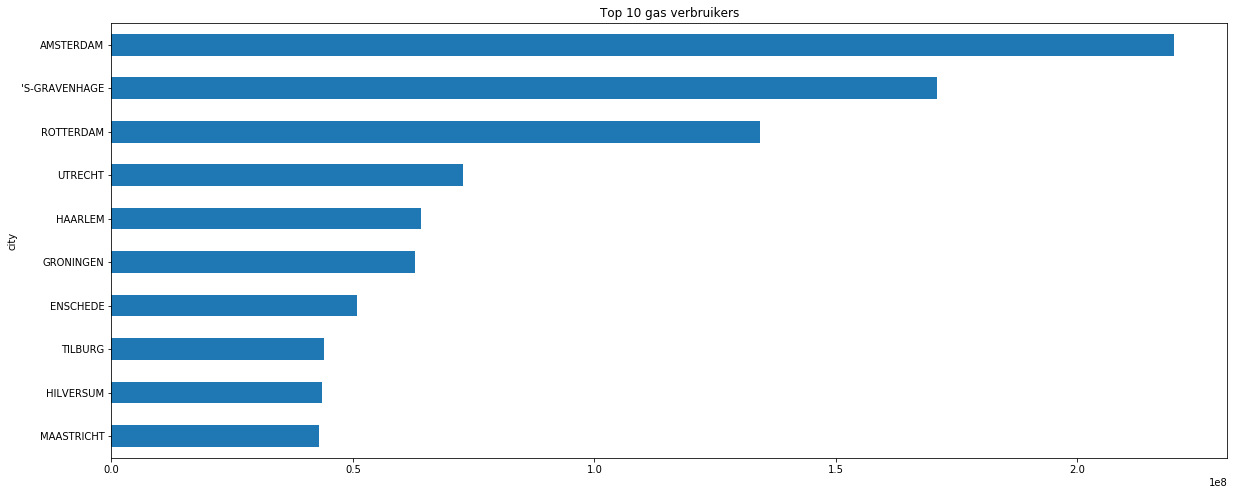

In [26]:
totalConsumePerCity = gasFrame.groupby(['city'])['annual_consume'].sum().sort_values(ascending=False)
print(totalConsumePerCity.count())

fig, ax = plt.subplots(1,1, figsize=(20, 8))
totalConsumePerCity.head(10).sort_values().plot(kind='barh', title='Top 10 gas verbruikers')
plt.show()

In [36]:
gasFrame["active_conections"] = round(gasFrame["num_connections"]*gasFrame["perc_of_active_connections"]/100) #calculate number of active connections
gasFrame["average_consume"] = gasFrame['annual_consume']/gasFrame["active_conections"] #calcuate average cunsumption per active connection
gasFrame["average_consume"] = gasFrame["average_consume"].replace({float('inf'):0}) #replace all divide by 0 problems

2129


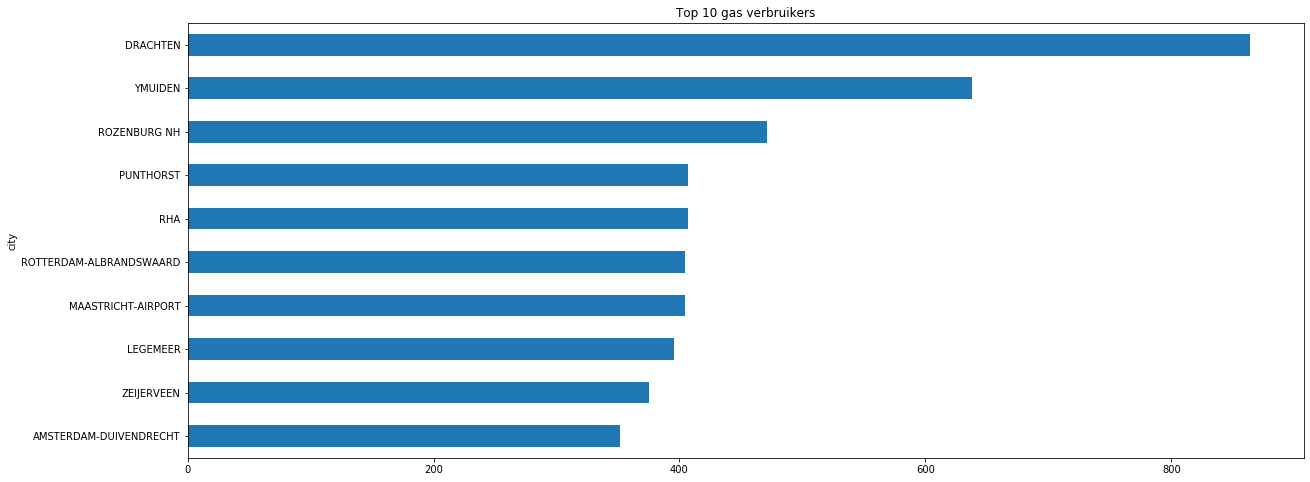

In [40]:
averageConsumePerCity = gasFrame.groupby(['city'])['average_consume'].mean().sort_values(ascending=False)
print(averageConsumePerCity.count())

fig, ax = plt.subplots(1,1, figsize=(20, 8))
averageConsumePerCity.head(10).sort_values().plot(kind='barh', title='Top 10 gas verbruikers')
plt.show()

4


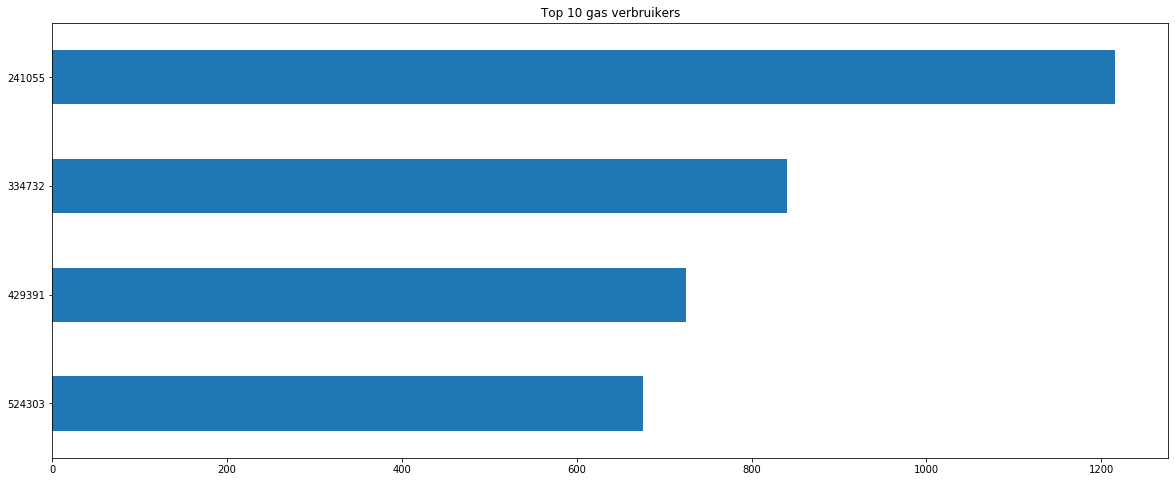

In [58]:
singleCity = gasFrame.loc[gasFrame["city"] == "DRACHTEN"]
print(singleCity["annual_consume"].count())
fig, ax = plt.subplots(1,1, figsize=(20, 8))
singleCity["average_consume"].head(10).sort_values().plot(kind='barh', title='Top 10 gas verbruikers')
plt.show()

In [25]:
sortedCities = gasFrame.groupby(['city', 'year'])[['annual_consume','year']].sum().sort_values(['annual_consume', 'year'], ascending=[False, False])
top3 = sortedCities.loc[['AMSTERDAM', 'S-GRAVENHAGE', 'ROTTERDAM']]

# print(top3)
top3 = top3.reset_index()

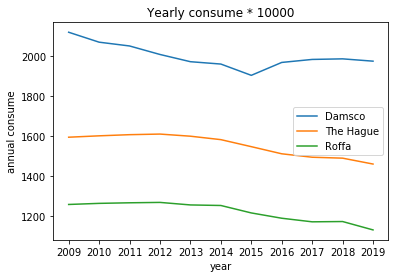

In [49]:
top3 = top3.sort_values(['city', 'year'])

x1 = top3[top3['city'] == 'AMSTERDAM']['year']
y1 = top3[top3['city'] == 'AMSTERDAM']['annual_consume']/10000
plt.plot(x1, y1, label = "Damsco")

x2 = top3[top3['city'] == 'S-GRAVENHAGE']['year']
y2 = top3[top3['city'] == 'S-GRAVENHAGE']['annual_consume']/10000
plt.plot(x2, y2, label = "The Hague")

x3 = top3[top3['city'] == 'ROTTERDAM']['year']
y3 = top3[top3['city'] == 'ROTTERDAM']['annual_consume']/10000
plt.plot(x3, y3, label = "Roffa")

plt.title('Yearly consume * 10000')
plt.xlabel('year')
plt.ylabel('annual consume')

plt.legend()
plt.show()

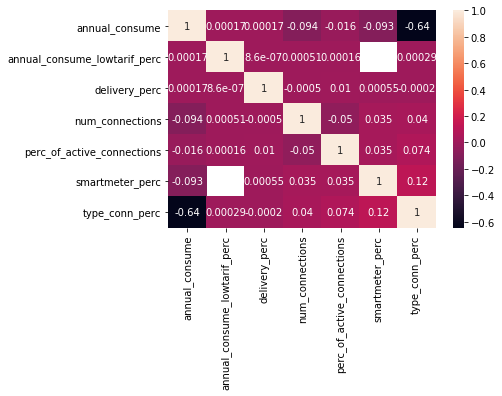

In [52]:
corr = gasFrame.corr()

sns.heatmap(corr, annot=True)

         annual use  # households  average use
2009   97783.836200        214167  4565.775129
2010  151664.251100        323139  4693.467861
2011  152521.313000        325219  4689.803271
2012  154323.431200        327989  4705.140453
2013  154687.333100        331975  4659.607895
2014  153084.688300        332385  4605.643705
2015  148446.935000        333615  4449.648097
2016  146126.587400        335007  4361.896539
2017  145989.905900        341250  4278.092481
2018  150845.282884        351123  4296.080943
2019  146564.089577        349921  4188.490819


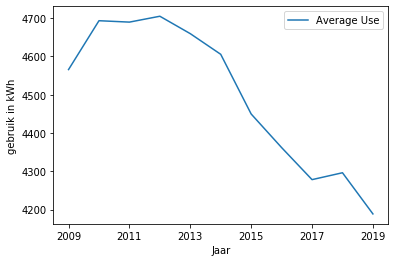

In [50]:
#fig, ax = plt.subplots(figsize=(15,7))
#annual_Consume_Elec = elecFrame.groupby('year').count()['annual_consume'].plot(ax=ax)
#plt.show()


#elecFrame["annual_consume"].sum(axis=0).where(elecFrame["year"] == "2010", 0)
#df['total'] = elecFrame.loc[elecFrame['year'] == 2010,['annual_consume']].sum(axis=0)

years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

cons_year = []
households_year = []
avg_cons = []
for i in years:
    sum_ann = elecFrame["annual_consume"].where(elecFrame['year'] == i).sum()
    sum_ann_div = sum_ann/10000
    households = elecFrame["year"].where(elecFrame["year"] == i).count()
    avg = sum_ann/households
    cons_year.append(sum_ann_div)
    households_year.append(households)
    avg_cons.append(avg)


data = zip(cons_year, households_year, avg_cons)
annual_use = pd.DataFrame(list(data), index = years, columns = ["annual use", "# households", "average use"])
#annual_use_electricity = pd.DataFrame(cons_year, index = years, columns = ["annual use"])
print(annual_use)
#annual_use.plot()
avg_use = pd.DataFrame(avg_cons, index = years, columns = ["Average Use"])
avg_use_plot = avg_use.plot()
avg_use_plot.set_ylabel("gebruik in kWh")
avg_use_plot.set_xlabel("Jaar")
plt.show()

# Evaluation

# Deployment